In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
np.random.seed(42)
X=np.random.rand(100,1) - 0.5
y=3*X[:, 0]**2 + np.random.randn(100)

In [15]:
df=pd.DataFrame()
df['X']=X.reshape(100)
df['y']=y

In [17]:
df

,X,y
0,-0.125460,0.134268
1,0.450714,0.310423
2,0.231994,0.253224
3,0.098658,-1.958368
4,-0.343981,0.135298
...,...,...
95,-0.006204,-0.815695
96,0.022733,-0.075551
97,-0.072459,0.356903
98,-0.474581,0.952372


Text(0.5, 1.0, 'X vs y')

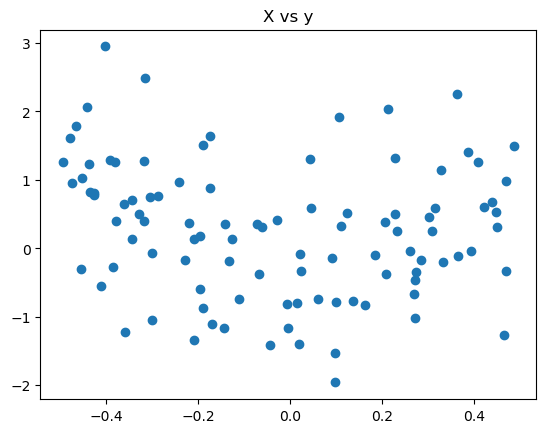

In [18]:
plt.scatter(df['X'],df['y'])
plt.title('X vs y')

In [19]:
df['pred1']=df['y'].mean()

In [20]:
df

,X,y,pred1
0,-0.125460,0.134268,0.264432
1,0.450714,0.310423,0.264432
2,0.231994,0.253224,0.264432
3,0.098658,-1.958368,0.264432
4,-0.343981,0.135298,0.264432
...,...,...,...
95,-0.006204,-0.815695,0.264432
96,0.022733,-0.075551,0.264432
97,-0.072459,0.356903,0.264432
98,-0.474581,0.952372,0.264432


In [21]:
df['res1']=df['y']-df['pred1']

In [22]:
df

,X,y,pred1,res1
0,-0.125460,0.134268,0.264432,-0.130164
1,0.450714,0.310423,0.264432,0.045991
2,0.231994,0.253224,0.264432,-0.011208
3,0.098658,-1.958368,0.264432,-2.222800
4,-0.343981,0.135298,0.264432,-0.129134
...,...,...,...,...
95,-0.006204,-0.815695,0.264432,-1.080127
96,0.022733,-0.075551,0.264432,-0.339983
97,-0.072459,0.356903,0.264432,0.092471
98,-0.474581,0.952372,0.264432,0.687940


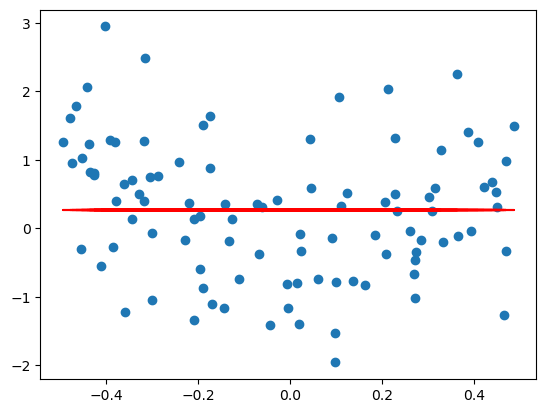

In [23]:
plt.scatter(df['X'],df['y'])
plt.plot(df['X'],df['pred1'],color='red')

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
tree1=DecisionTreeRegressor(max_leaf_nodes=8)

In [26]:
tree1.fit(df['X'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

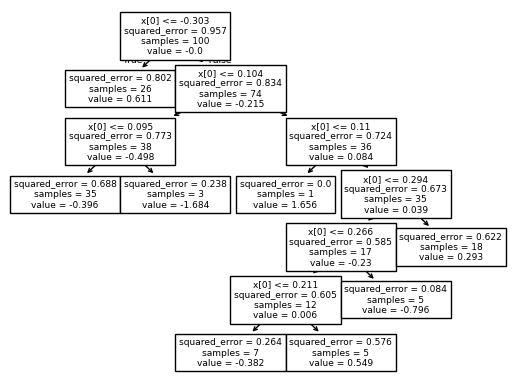

In [27]:
from sklearn.tree import plot_tree
plot_tree(tree1)
plt.show()

In [28]:
#Generating X test 
X_test=np.linspace(-0.5,0.5,500)

In [29]:
y_pred=0.265458 + tree1.predict(X_test.reshape(500,1))

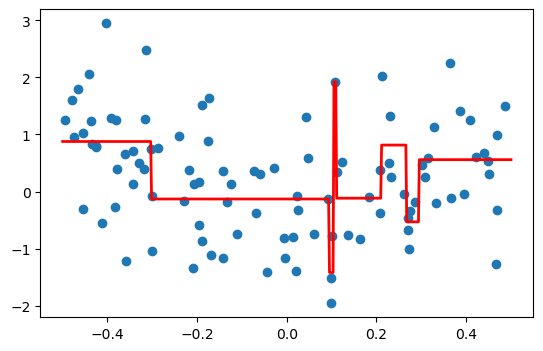

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])

In [31]:
df['pred2']=0.265458 + tree1.predict(df['X'].values.reshape(100,1))

In [32]:
df

,X,y,pred1,res1,pred2
0,-0.125460,0.134268,0.264432,-0.130164,-0.130789
1,0.450714,0.310423,0.264432,0.045991,0.558728
2,0.231994,0.253224,0.264432,-0.011208,0.814148
3,0.098658,-1.958368,0.264432,-2.222800,-1.418341
4,-0.343981,0.135298,0.264432,-0.129134,0.876918
...,...,...,...,...,...
95,-0.006204,-0.815695,0.264432,-1.080127,-0.130789
96,0.022733,-0.075551,0.264432,-0.339983,-0.130789
97,-0.072459,0.356903,0.264432,0.092471,-0.130789
98,-0.474581,0.952372,0.264432,0.687940,0.876918


In [33]:
df['res2']=df['y']-df['pred2']

In [34]:
df

,X,y,pred1,res1,pred2,res2
0,-0.125460,0.134268,0.264432,-0.130164,-0.130789,0.265056
1,0.450714,0.310423,0.264432,0.045991,0.558728,-0.248305
2,0.231994,0.253224,0.264432,-0.011208,0.814148,-0.560923
3,0.098658,-1.958368,0.264432,-2.222800,-1.418341,-0.540028
4,-0.343981,0.135298,0.264432,-0.129134,0.876918,-0.741620
...,...,...,...,...,...,...
95,-0.006204,-0.815695,0.264432,-1.080127,-0.130789,-0.684906
96,0.022733,-0.075551,0.264432,-0.339983,-0.130789,0.055237
97,-0.072459,0.356903,0.264432,0.092471,-0.130789,0.487692
98,-0.474581,0.952372,0.264432,0.687940,0.876918,0.075454


In [35]:
tree2=DecisionTreeRegressor(max_leaf_nodes=8)

In [36]:
tree2.fit(df['X'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [37]:
y_pred=0.265458 + sum(regressor.predict(X_test.reshape(-1,1)) for regressor in [tree1,tree2])

Text(0.5, 1.0, 'X vs y')

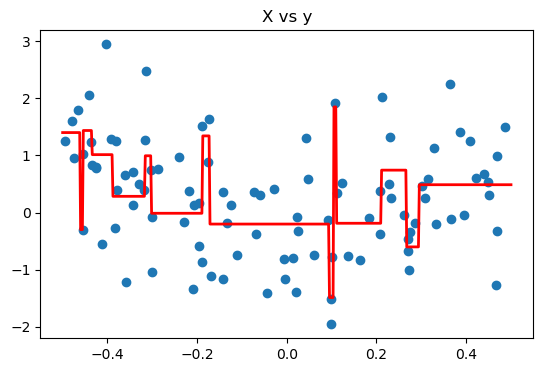

In [38]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(X_test,y_pred,linewidth=2,color='red')
plt.scatter(df['X'],df['y'])
plt.title('X vs y')